In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv")
print(data.head())

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [2]:
data.tail()

,Text,language
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese
21999,aprilie sonda spațială messenger a nasa și-a ...,Romanian


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [4]:
data.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


In [5]:
data.isnull().any()

Text        False
language    False
dtype: bool

In [6]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [7]:
data.shape

(22000, 2)

In [8]:
data["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [9]:
y=data["language"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

Univariate Analysis

<ipython-input-10-0f415a98584e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: ylabel='Density'>

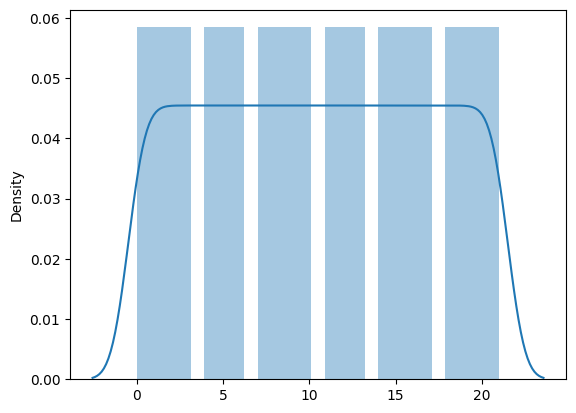

In [10]:
sns.distplot(y)

([<matplotlib.patches.Wedge at 0x7f9a85c90160>,
 [Text(1.0888035854028022, 0.15654632673430227, ''),
  Text(1.0005951890558762, 0.4569565270769591, ''),
  Text(0.8313245164615624, 0.7203468250294088, ''),
  Text(0.5947048716338131, 0.9253789038307552, ''),
  Text(0.3099057721001755, 1.055442282845914, ''),
  Text(-5.149471629032507e-08, 1.0999999999999988, ''),
  Text(-0.3099058709178122, 1.0554422538304369, ''),
  Text(-0.5947049582740361, 0.9253788481504627, ''),
  Text(-0.8313245839052957, 0.7203467471951874, ''),
  Text(-1.0005952318392295, 0.4569564333944747, ''),
  Text(-1.0888036000597223, 0.1565462247931527, ''),
  Text(-1.0888035707458725, -0.15654642867545038, ''),
  Text(-1.000595146272514, -0.45695662075943977, ''),
  Text(-0.8313244490178215, -0.7203469028636242, ''),
  Text(-0.5947047849935851, -0.9253789595110394, ''),
  Text(-0.3099056732825361, -1.0554423118613818, ''),
  Text(1.5448414935947287e-07, -1.0999999999999892, ''),
  Text(0.3099059697354461, -1.0554422248149

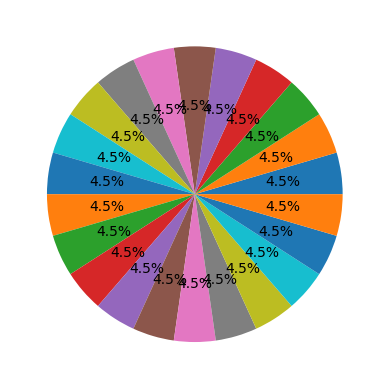

In [11]:
plt.pie(data["language"].value_counts(), autopct='%1.1f%%')

In [12]:
x=data["Text"]
y=data["language"]

In [13]:
cv=CountVectorizer()
X=cv.fit_transform(x)

CountVectorizer is a great tool provided by the scikit-learn library in Python.It is used to transform a given text into a vector on the basis of the frequency(count) of each word that occurs in the entire text

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [15]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [16]:
ry_pred = model.predict(X_test)

In [17]:
ry_pred_train = model.predict(X_train)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Testing Accuracy = ', accuracy_score(y_test,ry_pred))
print('Training Accuracy = ', accuracy_score(y_train,ry_pred_train))

Testing Accuracy =  0.953168044077135
Training Accuracy =  0.9841248303934871


In [19]:
pd.crosstab(y_test,ry_pred)

col_0,Arabic,Chinese,Dutch,English,Estonian,French,Hindi,Indonesian,Japanese,Korean,...,Portugese,Pushto,Romanian,Russian,Spanish,Swedish,Tamil,Thai,Turkish,Urdu
language,,,,,,,,,,,,,,,,,,,,,
Arabic,340,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chinese,0,159,0,25,0,2,0,0,119,0,...,0,0,3,0,3,2,0,0,3,0
Dutch,0,0,342,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
English,0,0,0,333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Estonian,0,0,1,8,325,1,0,1,0,0,...,0,0,0,2,0,0,0,0,0,0
French,0,0,0,3,0,320,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Hindi,0,0,0,7,0,0,334,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Indonesian,0,0,0,10,0,0,0,308,0,0,...,0,0,0,0,0,0,0,0,0,0
Japanese,0,12,2,12,3,4,1,1,284,0,...,0,0,1,1,3,2,0,0,1,0


In [20]:
print(classification_report(y_test,ry_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       341
     Chinese       0.93      0.50      0.65       317
       Dutch       0.99      0.99      0.99       346
     English       0.70      1.00      0.82       333
    Estonian       0.99      0.96      0.97       338
      French       0.95      0.99      0.97       324
       Hindi       1.00      0.98      0.99       341
  Indonesian       0.99      0.97      0.98       318
    Japanese       0.69      0.87      0.77       328
      Korean       1.00      0.98      0.99       325
       Latin       0.99      0.91      0.95       346
     Persian       1.00      1.00      1.00       323
   Portugese       1.00      0.96      0.98       318
      Pushto       1.00      0.97      0.98       328
    Romanian       0.99      0.98      0.99       324
     Russian       0.99      0.99      0.99       332
     Spanish       0.97      0.99      0.98       322
     Swedish       0.99    

Prediction System

In [21]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: I am Anjali
['English']


In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

In [23]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text:  klement gottwaldi surnukeha palsameeriti ning 
['Estonian']


In [25]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: अंजलि
['Hindi']
